#### Question 1

##### Graphical Summary of Escape Times

In [1]:
import pandas as pd
df1 = pd.read_csv('..\homework_files\escape.csv')
df1.head(5)

,Time
0,389
1,356
2,359
3,363
4,375


<AxesSubplot: ylabel='Count'>

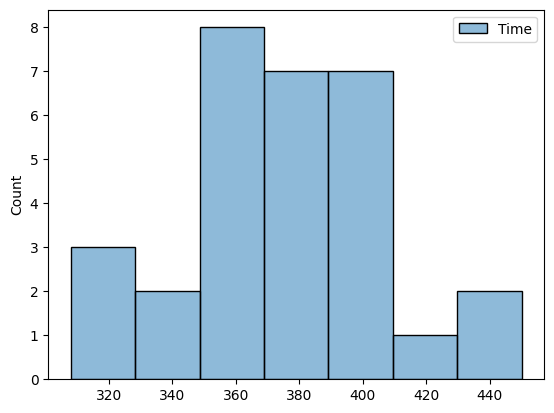

In [2]:
import seaborn as sns
sns.histplot(data=df1)

Distribution is unimodel with a slight skew to the left.

##### Numerical Summary of Escape Times

In [41]:
IQR = df1.describe().loc['75%'][0] - df1.describe().loc['25%'][0]
print('Median: {}\nVar: {}\nIQR: {},\nOthers:'.format(
    df1.median()['Time'], df1.var()['Time'], IQR))
df1.describe()


Median: 371.5
Var: 1051.9091954022988
IQR: 34.0,
Others:


,Time
count,30.000000
mean,374.433333
std,32.433150
min,308.000000
25%,359.000000
50%,371.500000
75%,393.000000
max,450.000000


##### Outliers

In [43]:
df1['Outlier'] = df1.Time.apply(lambda x : (x < df1.describe().loc['25%'][0] - 1.5 * IQR ) ^ (x > df1.describe().loc['75%'][0] + 1.5 * IQR))
df1['Extreme_Outlier'] = df1.Time.apply(lambda x : (x < df1.describe().loc['25%'][0] - 3 * IQR ) ^ (x > df1.describe().loc['75%'][0] + 3 * IQR))
print("Outliers:")
df1[(df1['Outlier'] == True)]

Outliers:


,Time,Outlier,Extreme_Outlier
26,450,True,False


In [44]:
print("Extreme Outliers:")
df1[(df1['Extreme_Outlier'] == True)]

Extreme Outliers:


,Time,Outlier,Extreme_Outlier


##### Box & Whiskers Diagram

<AxesSubplot: >

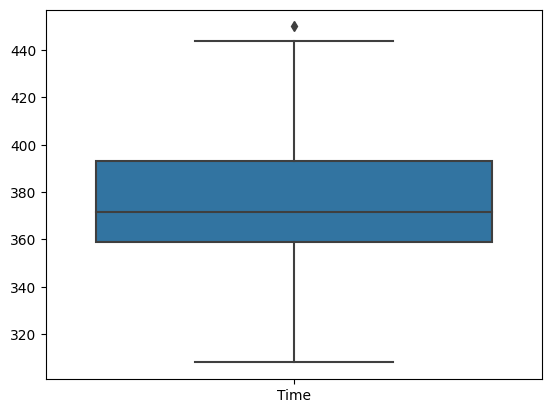

In [45]:
df1.drop(columns=['Outlier', 'Extreme_Outlier'], inplace=True)
sns.boxplot(data=df1)

* 1 outlier.
* No Extreme Outliers 
* Most datapoints are between 1st & 2nd quartile.